 ## Clasificarea Restaurantelor din Ghidul Michelin:
# Analize și predicții folosind tehnici de Data Mining



CSIE - Master Statistica Aplicata & Data Science
Proiect Data Mining - Draghicescu Alexandra-Elena grupa 1153 | Bucuresti, 2024

# Import libraries

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Intro Data Set

In [39]:
# Load the dataset
data = pd.read_csv('michelin_my_maps.csv')


In [40]:
data.shape

(17294, 14)

In [41]:
data.head()

,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,GreenStar,FacilitiesAndServices,Description
0,Taïrroir,"6F, 299 Lequn 3rd Road, Zhongshan District, Ta...","Taipei, Taiwan",$$$$,Taiwanese contemporary,121.559303,25.082896,8.862850e+11,https://guide.michelin.com/en/taipei-region/ta...,https://www.tairroir.com/,3 Stars,0,"Air conditioning,Wheelchair access","A portmanteau of Taiwan and terroir, Taïrroir ..."
1,JL Studio,"2F, 689, Section 4, Yifeng Road, Nantun Distri...","Taichung, Taiwan",$$$$,"Singaporean, Contemporary",120.628520,24.150486,8.864238e+11,https://guide.michelin.com/en/taichung-region/...,https://jlstudiotw.com,3 Stars,0,"Air conditioning,Car park,Wheelchair access","JL stands for Jimmy Lim, a Singaporean chef wh..."
2,Le Palais,"17F, Palais de Chine Hotel, 3, Section 1, Chen...","Taipei, Taiwan",$$$$,Cantonese,121.516889,25.049163,8.862218e+11,https://guide.michelin.com/en/taipei-region/ta...,https://www.palaisdechinehotel.com/pdc-en/page...,3 Stars,0,"Air conditioning,Car park,Wheelchair access","After the departure of the Macanese chef, the ..."
3,Addison,"5200 Grand Del Mar Way, San Diego, 92130, USA","San Diego, USA",$$$$,"Contemporary, Californian",-117.198891,32.941297,1.858314e+10,https://guide.michelin.com/en/california/us-sa...,https://www.addisondelmar.com/,3 Stars,0,"Air conditioning,Car park,Garden or park,Inter...",Chef William Bradley has helmed the stoves at ...
4,Atelier Crenn,"3127 Fillmore St., San Francisco, 94123, USA","San Francisco, USA",$$$$,"Contemporary, French",-122.435860,37.798350,1.415440e+10,https://guide.michelin.com/en/california/san-f...,https://www.ateliercrenn.com/,3 Stars,1,"Air conditioning,Interesting wine list,Wheelch...",At the hands of accomplished Chef Dominique Cr...


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17294 entries, 0 to 17293
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   17294 non-null  object 
 1   Address                17294 non-null  object 
 2   Location               17294 non-null  object 
 3   Price                  17293 non-null  object 
 4   Cuisine                17293 non-null  object 
 5   Longitude              17294 non-null  float64
 6   Latitude               17294 non-null  float64
 7   PhoneNumber            16928 non-null  float64
 8   Url                    17294 non-null  object 
 9   WebsiteUrl             14884 non-null  object 
 10  Award                  17294 non-null  object 
 11  GreenStar              17294 non-null  int64  
 12  FacilitiesAndServices  16409 non-null  object 
 13  Description            17293 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 1.8+

In [43]:
#info on numeric data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Longitude,17294.0,1.724651e+01,6.113841e+01,-1.237191e+02,-3.689379e-01,6.641560e+00,1.523340e+01,1.398257e+02
Latitude,17294.0,4.041490e+01,1.358626e+01,-3.462679e+01,3.661320e+01,4.383351e+01,4.886302e+01,6.616656e+01
PhoneNumber,16928.0,5.348054e+11,9.396673e+12,3.522369e+07,3.314703e+10,3.852091e+10,3.904375e+11,9.719716e+14
GreenStar,17294.0,2.220423e-02,1.473515e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [44]:
data.describe(include='object').T

,count,unique,top,freq
Name,17294,16634,Racines,9
Address,17294,16916,"Ferdinand Bolstraat 333, Amsterdam, 1072 LH, N...",4
Location,17294,5640,"Tokyo, Japan",547
Price,17293,32,€€,4684
Cuisine,17293,1612,Modern Cuisine,2735
Url,17294,17294,https://guide.michelin.com/en/prague/prague/re...,1
WebsiteUrl,14884,14657,http://www.xinrongji.cc,5
Award,17294,5,Selected Restaurants,10510
FacilitiesAndServices,16409,878,Air conditioning,1492
Description,17293,17292,"Here, the second generation of the family sell...",2


In [45]:
#drop unnecessary data column 
df=data.drop(['Longitude','Latitude','Address','PhoneNumber','WebsiteUrl','Description'],axis=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17294 entries, 0 to 17293
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   17294 non-null  object
 1   Location               17294 non-null  object
 2   Price                  17293 non-null  object
 3   Cuisine                17293 non-null  object
 4   Url                    17294 non-null  object
 5   Award                  17294 non-null  object
 6   GreenStar              17294 non-null  int64 
 7   FacilitiesAndServices  16409 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.1+ MB


In [47]:
df.isnull().sum()

Name                       0
Location                   0
Price                      1
Cuisine                    1
Url                        0
Award                      0
GreenStar                  0
FacilitiesAndServices    885
dtype: int64

In [48]:
#considering FacilitiesAndServices as being optional,I ll drop the restaurants with no price and no cuisine 
#considering 1 single value as being not very influent 
df = df.dropna(subset=['Price', 'Cuisine'])


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17293 entries, 0 to 17293
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   17293 non-null  object
 1   Location               17293 non-null  object
 2   Price                  17293 non-null  object
 3   Cuisine                17293 non-null  object
 4   Url                    17293 non-null  object
 5   Award                  17293 non-null  object
 6   GreenStar              17293 non-null  int64 
 7   FacilitiesAndServices  16409 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.2+ MB


In [50]:
df.describe(include='object').T

,count,unique,top,freq
Name,17293,16633,Racines,9
Location,17293,5640,"Tokyo, Japan",547
Price,17293,32,€€,4684
Cuisine,17293,1612,Modern Cuisine,2735
Url,17293,17293,https://guide.michelin.com/en/prague/prague/re...,1
Award,17293,5,Selected Restaurants,10509
FacilitiesAndServices,16409,878,Air conditioning,1492


# EDA

In [51]:
df['Award'].value_counts()

Award
Selected Restaurants    10509
Bib Gourmand             3240
1 Star                   2905
2 Stars                   494
3 Stars                   145
Name: count, dtype: int64

In [52]:
df['Price'].value_counts()

Price
€€      4684
€€€     3271
€€€€    1876
$$      1178
$$$      894
$$$$     776
¥¥¥      705
€        548
$        496
££       451
¥¥       426
£££      352
¥¥¥¥     239
££££     214
฿฿       212
¥        201
฿        128
₩         87
฿฿฿       82
₫         76
₩₩        59
₫₫        48
₺₺        46
₩₩₩₩      46
฿฿฿฿      44
₩₩₩       40
₫₫₫       25
₺₺₺       24
₺₺₺₺      21
₫₫₫₫      15
₺         15
£         14
Name: count, dtype: int64

In [53]:
#encode the price variable 
df['Price_enc'] = df['Price'].apply(lambda x: len(x))  # Count the number of dollar signs


In [54]:
df['Price_enc'].value_counts()

Price_enc
2    7104
3    5393
4    3231
1    1565
Name: count, dtype: int64

In [55]:
df['Location'].value_counts()

Location
Tokyo, Japan                547
Paris, France               446
New York, USA               390
London, United Kingdom      343
Singapore                   283
                           ... 
Eext, Netherlands             1
Medemblik, Netherlands        1
Flobecq, Belgium              1
Hardenberg, Netherlands       1
Wijdewormer, Netherlands      1
Name: count, Length: 5640, dtype: int64

In [56]:
# Step 1: Split the 'Location' column into two new columns 'City' and 'Country'
df[['City', 'Country']] = df['Location'].str.split(', ', expand=True)

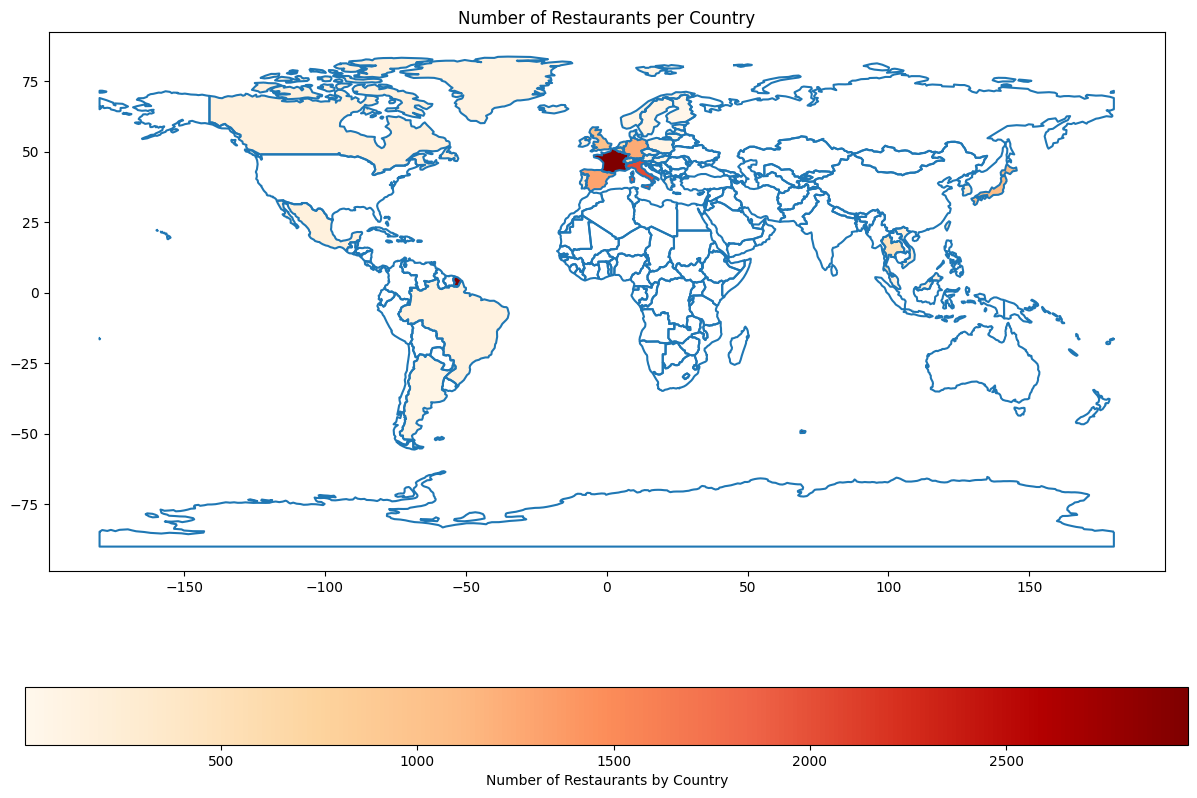

In [57]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Group by country and count the number of restaurants
country_counts = df.groupby('Country').size().reset_index(name='Restaurant Count')

# Step 2: Load the Natural Earth countries shapefile
# Replace 'path_to_your_data' with the actual path where you extracted the shapefile
world = gpd.read_file(r'C:\Users\user\Desktop\STAT ANUL II\DATA MINING\PROIECT DATA MINING\ne_110m_admin_0_countries.shp')

# Step 3: Merge the world map with the restaurant data
world = world.merge(country_counts, how='left', left_on='SOVEREIGNT', right_on='Country')

# Step 4: Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Restaurant Count', ax=ax, legend=True,
           legend_kwds={'label': "Number of Restaurants by Country",
                        'orientation': "horizontal"}, cmap='OrRd')

plt.title('Number of Restaurants per Country')
plt.show()

In [58]:
# Load the shapefile
world = gpd.read_file(r'C:\Users\user\Desktop\STAT ANUL II\DATA MINING\PROIECT DATA MINING\ne_110m_admin_0_countries.shp')

# Check the columns
print(world.columns)


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [59]:
print(world)

          featurecla  scalerank  LABELRANK                   SOVEREIGNT  \
0    Admin-0 country          1          6                         Fiji   
1    Admin-0 country          1          3  United Republic of Tanzania   
2    Admin-0 country          1          7               Western Sahara   
3    Admin-0 country          1          2                       Canada   
4    Admin-0 country          1          2     United States of America   
..               ...        ...        ...                          ...   
172  Admin-0 country          1          5           Republic of Serbia   
173  Admin-0 country          1          6                   Montenegro   
174  Admin-0 country          1          6                       Kosovo   
175  Admin-0 country          1          5          Trinidad and Tobago   
176  Admin-0 country          1          3                  South Sudan   

    SOV_A3  ADM0_DIF  LEVEL               TYPE TLC  \
0      FJI         0      2  Sovereign countr

In [60]:
df['Cuisine'].value_counts()

Cuisine
Modern Cuisine                   2735
Traditional Cuisine               765
Creative                          619
Japanese                          534
Contemporary                      461
                                 ... 
Chinese, Shaanxi                    1
Spanish, Small eats                 1
South American, Asian               1
Portuguese, Asian Influences        1
South African, Modern Cuisine       1
Name: count, Length: 1612, dtype: int64

In [61]:
df['FacilitiesAndServices'].value_counts()

FacilitiesAndServices
Air conditioning                                                                                                                       1492
Air conditioning,Terrace                                                                                                                995
Air conditioning,Counter dining                                                                                                         881
Terrace                                                                                                                                 825
Air conditioning,Wheelchair access                                                                                                      660
                                                                                                                                       ... 
Air conditioning,Counter dining,Great view,Interesting wine list,Terrace,Valet parking,Wheelchair access                                  

We observe as the Facilities and Services Variable as being composed of certain facilities.
Let's see which are the unique values for facilities.

In [62]:
# Step 1: Fill NaN values with an empty string (so they don't cause errors)
df['FacilitiesAndServices'] = df['FacilitiesAndServices'].fillna('')

# Step 2: Split the 'FacilitiesAndServices' column into individual values
facilities_series = df['FacilitiesAndServices'].str.split(',')

# Step 3: Flatten the list of facilities
facilities_flat = [item for sublist in facilities_series for item in sublist]

# Step 4: Remove empty strings (in case there were empty values after splitting)
facilities_flat = [facility for facility in facilities_flat if facility.strip()]

# Step 5: Find unique facilities
unique_facilities = set(facilities_flat)

# Step 6: Count the number of unique facilities
unique_facility_count = len(unique_facilities)

# Output the results
print("Unique Facilities:", unique_facilities)
print("Number of Unique Facilities:", unique_facility_count)

Unique Facilities: {'Counter dining', 'Brunch', 'Valet parking', 'Booking essential', 'Restaurant offering vegetarian menus', 'Booking essential - dinner', 'Cash only - lunch', 'Interesting wine list', 'Notable sake list', 'Terrace', 'Air conditioning', 'Shoes must be removed', 'Great view', 'Garden or park', 'Cash only', 'Bring your own bottle', 'Car park', 'Credit cards not accepted', 'Wheelchair access', 'Foreign credit cards not accepted'}
Number of Unique Facilities: 20


In [63]:
# Step 1: Fill NaN values with an empty string
df['FacilitiesAndServices'] = df['FacilitiesAndServices'].fillna('')

# Step 2: Split the 'FacilitiesAndServices' column into individual values
df['FacilitiesList'] = df['FacilitiesAndServices'].str.split(',')

# Step 3: Create dummy variables for each unique facility
# Explode the list into individual rows, one facility per row
df_exploded = df.explode('FacilitiesList')

# Step 4: Remove any extra whitespace around the facility names
df_exploded['FacilitiesList'] = df_exploded['FacilitiesList'].str.strip()

# Step 5: Use pandas get_dummies to create one-hot encoding for each facility
df_dummies = pd.get_dummies(df_exploded['FacilitiesList'])

# Step 6: Group by the original index (to compress exploded rows back)
# and aggregate using max to combine all dummy variables for each restaurant
df_with_dummies = df.join(df_dummies.groupby(df_exploded.index).max())

# Drop the temporary 'FacilitiesList' column
df_with_dummies.drop(columns=['FacilitiesList'], inplace=True)

print(df_with_dummies)

                Name                Location Price                    Cuisine  \
0           Taïrroir          Taipei, Taiwan  $$$$     Taiwanese contemporary   
1          JL Studio        Taichung, Taiwan  $$$$  Singaporean, Contemporary   
2          Le Palais          Taipei, Taiwan  $$$$                  Cantonese   
3            Addison          San Diego, USA  $$$$  Contemporary, Californian   
4      Atelier Crenn      San Francisco, USA  $$$$       Contemporary, French   
...              ...                     ...   ...                        ...   
17289     Kampa Park  Prague, Czech Republic   €€€             Modern Cuisine   
17290     La Veranda  Prague, Czech Republic    €€      Mediterranean Cuisine   
17291           Taro  Prague, Czech Republic   €€€                      Asian   
17292         Bockem  Prague, Czech Republic   €€€        Czech, Contemporary   
17293          Aromi  Prague, Czech Republic     €                    Italian   

                           

In [64]:
df_with_dummies.head()

,Name,Location,Price,Cuisine,Url,Award,GreenStar,FacilitiesAndServices,Price_enc,City,...,Foreign credit cards not accepted,Garden or park,Great view,Interesting wine list,Notable sake list,Restaurant offering vegetarian menus,Shoes must be removed,Terrace,Valet parking,Wheelchair access
0,Taïrroir,"Taipei, Taiwan",$$$$,Taiwanese contemporary,https://guide.michelin.com/en/taipei-region/ta...,3 Stars,0,"Air conditioning,Wheelchair access",4,Taipei,...,False,False,False,False,False,False,False,False,False,True
1,JL Studio,"Taichung, Taiwan",$$$$,"Singaporean, Contemporary",https://guide.michelin.com/en/taichung-region/...,3 Stars,0,"Air conditioning,Car park,Wheelchair access",4,Taichung,...,False,False,False,False,False,False,False,False,False,True
2,Le Palais,"Taipei, Taiwan",$$$$,Cantonese,https://guide.michelin.com/en/taipei-region/ta...,3 Stars,0,"Air conditioning,Car park,Wheelchair access",4,Taipei,...,False,False,False,False,False,False,False,False,False,True
3,Addison,"San Diego, USA",$$$$,"Contemporary, Californian",https://guide.michelin.com/en/california/us-sa...,3 Stars,0,"Air conditioning,Car park,Garden or park,Inter...",4,San Diego,...,False,True,False,True,False,False,False,True,True,True
4,Atelier Crenn,"San Francisco, USA",$$$$,"Contemporary, French",https://guide.michelin.com/en/california/san-f...,3 Stars,1,"Air conditioning,Interesting wine list,Wheelch...",4,San Francisco,...,False,False,False,True,False,False,False,False,False,True


In [69]:
# Step 7: Check frequency of each facility
facility_frequencies = df_with_dummies.iloc[:,11:].sum()

# Output the frequency of each facility
print("Frequency of each facility:")
print(facility_frequencies)

Frequency of each facility:
                                          884
Air conditioning                        11343
Booking essential                           7
Booking essential - dinner                  4
Bring your own bottle                      33
Brunch                                    453
Car park                                 5286
Cash only                                 784
Cash only - lunch                          33
Counter dining                           2223
Credit cards not accepted                 208
Foreign credit cards not accepted          73
Garden or park                           1473
Great view                               1701
Interesting wine list                    3190
Notable sake list                         245
Restaurant offering vegetarian menus     2363
Shoes must be removed                      71
Terrace                                  8087
Valet parking                            1095
Wheelchair access                        5589
dtype:

Absolute values of restaurants for each award category:
Award Category: Selected Restaurants, Absolute Count: 10509
Award Category: Bib Gourmand, Absolute Count: 3240
Award Category: 1 Star, Absolute Count: 2905
Award Category: 2 Stars, Absolute Count: 494
Award Category: 3 Stars, Absolute Count: 145

Total number of restaurants: 17293


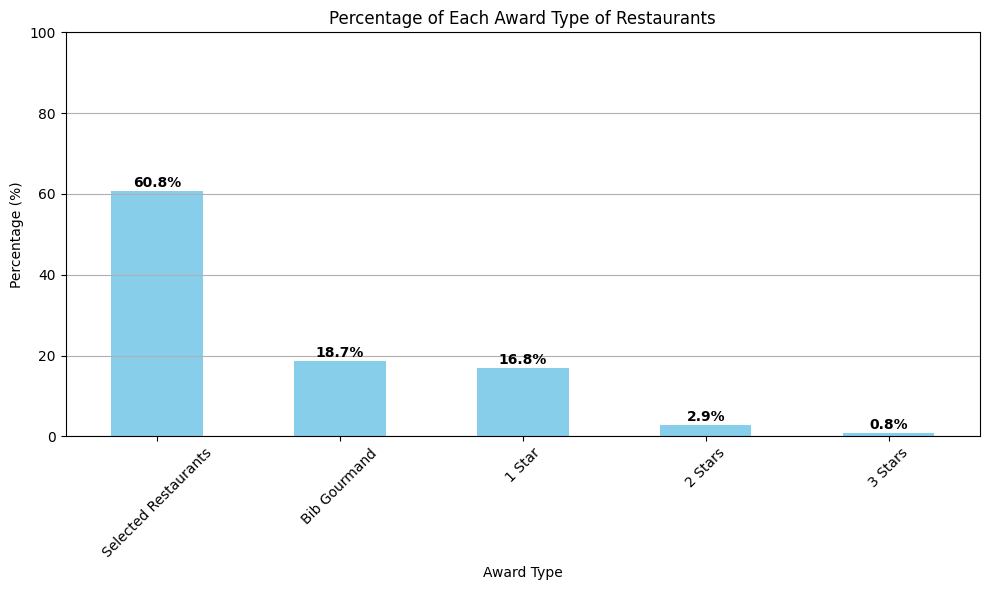

In [95]:
# Print absolute values for each award category
print("Absolute values of restaurants for each award category:")
for award, abs_value in award_counts.items():
    print(f"Award Category: {award}, Absolute Count: {abs_value}")

# Step 3: Calculate total number of restaurants for the overall category
total_restaurants = len(df_with_dummies)
print(f"\nTotal number of restaurants: {total_restaurants}")

# Step 1: Calculate the percentage of each award type
award_counts = df_with_dummies['Award'].value_counts()
award_percentages = (award_counts / award_counts.sum()) * 100

# Step 2: Plot the data
plt.figure(figsize=(10, 6))
award_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Each Award Type of Restaurants')
plt.xlabel('Award Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.grid(axis='y')

# Display the percentage on top of the bars
for i, v in enumerate(award_percentages):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()  # Adjust layout for better fit
plt.show()

Absolute values of restaurants for each price category:
Price Category: 2, Absolute Count: 7104
Price Category: 3, Absolute Count: 5393
Price Category: 4, Absolute Count: 3231
Price Category: 1, Absolute Count: 1565

Total number of restaurants: 17293


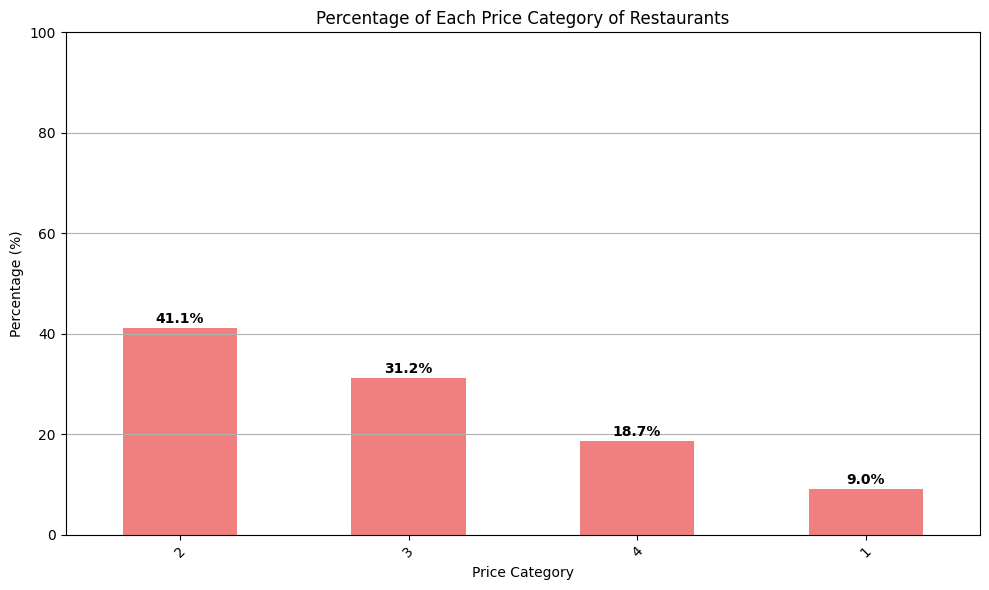

In [96]:
print("Absolute values of restaurants for each price category:")
for price, abs_value in price_counts.items():
    print(f"Price Category: {price}, Absolute Count: {abs_value}")

# Step 3: Calculate total number of restaurants for the overall category
total_restaurants = len(df_with_dummies)
print(f"\nTotal number of restaurants: {total_restaurants}")


# Step 1: Calculate the percentage of each price category
price_counts = df_with_dummies['Price_enc'].value_counts()
price_percentages = (price_counts / price_counts.sum()) * 100

# Step 2: Plot the data
plt.figure(figsize=(10, 6))
price_percentages.plot(kind='bar', color='lightcoral')
plt.title('Percentage of Each Price Category of Restaurants')
plt.xlabel('Price Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.grid(axis='y')

# Display the percentage on top of the bars
for i, v in enumerate(price_percentages):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()  # Adjust layout for better fit
plt.show()


In [83]:
df_with_dummies

,Name,Location,Price,Cuisine,Url,Award,GreenStar,FacilitiesAndServices,Price_enc,City,...,Great view,Interesting wine list,Notable sake list,Restaurant offering vegetarian menus,Shoes must be removed,Terrace,Valet parking,Wheelchair access,Total Facilities,Count of True Facilities
0,Taïrroir,"Taipei, Taiwan",$$$$,Taiwanese contemporary,https://guide.michelin.com/en/taipei-region/ta...,3 Stars,0,"Air conditioning,Wheelchair access",4,Taipei,...,False,False,False,False,False,False,False,True,2,16
1,JL Studio,"Taichung, Taiwan",$$$$,"Singaporean, Contemporary",https://guide.michelin.com/en/taichung-region/...,3 Stars,0,"Air conditioning,Car park,Wheelchair access",4,Taichung,...,False,False,False,False,False,False,False,True,3,24
2,Le Palais,"Taipei, Taiwan",$$$$,Cantonese,https://guide.michelin.com/en/taipei-region/ta...,3 Stars,0,"Air conditioning,Car park,Wheelchair access",4,Taipei,...,False,False,False,False,False,False,False,True,3,24
3,Addison,"San Diego, USA",$$$$,"Contemporary, Californian",https://guide.michelin.com/en/california/us-sa...,3 Stars,0,"Air conditioning,Car park,Garden or park,Inter...",4,San Diego,...,False,True,False,False,False,True,True,True,7,56
4,Atelier Crenn,"San Francisco, USA",$$$$,"Contemporary, French",https://guide.michelin.com/en/california/san-f...,3 Stars,1,"Air conditioning,Interesting wine list,Wheelch...",4,San Francisco,...,False,True,False,False,False,False,False,True,3,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17289,Kampa Park,"Prague, Czech Republic",€€€,Modern Cuisine,https://guide.michelin.com/en/prague/prague/re...,Selected Restaurants,0,"Air conditioning,Booking essential - dinner,Gr...",3,Prague,...,True,False,False,False,False,True,False,False,4,32
17290,La Veranda,"Prague, Czech Republic",€€,Mediterranean Cuisine,https://guide.michelin.com/en/prague/prague/re...,Selected Restaurants,0,Air conditioning,2,Prague,...,False,False,False,False,False,False,False,False,1,8
17291,Taro,"Prague, Czech Republic",€€€,Asian,https://guide.michelin.com/en/prague/prague/re...,Selected Restaurants,0,"Air conditioning,Counter dining",3,Prague,...,False,False,False,False,False,False,False,False,2,16
17292,Bockem,"Prague, Czech Republic",€€€,"Czech, Contemporary",https://guide.michelin.com/en/prague/prague/re...,Selected Restaurants,0,Booking essential,3,Prague,...,False,False,False,False,False,False,False,False,1,8


Absolute values of restaurants for each number of facilities:
Number of Facilities: 1, Absolute Count: 4177
Number of Facilities: 2, Absolute Count: 5154
Number of Facilities: 3, Absolute Count: 3886
Number of Facilities: 4, Absolute Count: 2299
Number of Facilities: 5, Absolute Count: 1103
Number of Facilities: 6, Absolute Count: 482
Number of Facilities: 7, Absolute Count: 144
Number of Facilities: 8, Absolute Count: 41
Number of Facilities: 9, Absolute Count: 7

Total number of restaurants: 17293


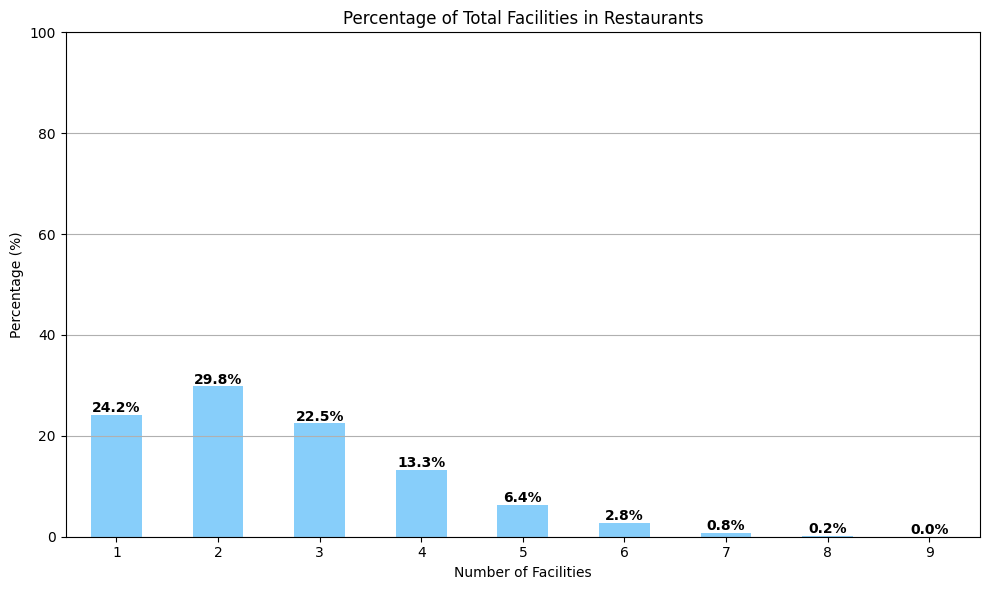

In [ ]:
print("Absolute values of restaurants for each number of facilities:")
for count, abs_value in facility_counts.items():
    print(f"Number of Facilities: {count}, Absolute Count: {abs_value}")

# Step 3: Calculate total number of restaurants for the overall category
total_restaurants = len(df_with_dummies)
print(f"\nTotal number of restaurants: {total_restaurants}")

# Step 2: Calculate the frequency of each total facilities count
facility_counts = df_with_dummies['Total Facilities'].value_counts().sort_index()

# Step 3: Calculate the percentage for each count
facility_percentage = (facility_counts / len(df_with_dummies)) * 100

# Step 4: Plot the percentage distribution
plt.figure(figsize=(10, 6))
facility_percentage.plot(kind='bar', color='lightskyblue')
plt.title('Percentage of Total Facilities in Restaurants')
plt.xlabel('Number of Facilities')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.grid(axis='y')

# Display the percentage on top of the bars
for i, v in enumerate(facility_percentage):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()  # Adjust layout for better fit
plt.show()



# Data Preprocessing


In [102]:
# Step 1: Preprocess the dataset

# One-hot encode 'Cuisine'
encoder_cuisine = OneHotEncoder(sparse_output=False)
X_cuisine = encoder_cuisine.fit_transform(df_with_dummies[['Cuisine']])

# One-hot encode 'City' and 'Country'
encoder_location_city = OneHotEncoder(sparse_output=False)
X_city = encoder_location_city.fit_transform(df_with_dummies[['City']])

encoder_location_country = OneHotEncoder(sparse_output=False)
X_country = encoder_location_country.fit_transform(df_with_dummies[['Country']])

# Encode 'Price' as the count of dollar signs
X_price = df_with_dummies[['Price_enc']].values  # Convert to numpy array

# One-hot encode 'FacilitiesAndServices'
encoder_facilities = OneHotEncoder(sparse_output=False)
X_facilities = encoder_facilities.fit_transform(df_with_dummies[['Total Facilities']])

# Label encode the target variable 'Award'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_with_dummies['Award'])  # Convert awards to numeric labels

# Combine the encoded features
X = np.hstack([X_cuisine, X_city, X_country, X_price, X_facilities])


In [107]:
#split into train and test
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    X, y, df_with_dummies.index, test_size=0.2, random_state=42)

# 1. Random Forest Model

In [108]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [110]:
rf_probs = rf_model.predict_proba(X_test)


In [118]:
y_pred_rf

array([4, 4, 4, ..., 4, 4, 4])

In [130]:
rf_pred_df = pd.DataFrame(y_pred_rf, columns=[f'RF_Pred_Class'])

In [131]:
rf_pred_df

,RF_Pred_Class
0,4
1,4
2,4
3,1
4,4
...,...
3454,4
3455,4
3456,4
3457,4


In [122]:
# Get class labels (award categories)
class_labels = rf_model.classes_
class_labels

array([0, 1, 2, 3, 4])

In [114]:
rf_probs

array([[0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.1       , 0.9       ],
       [0.15      , 0.        , 0.        , 0.        , 0.85      ],
       ...,
       [0.1       , 0.        , 0.        , 0.2       , 0.7       ],
       [0.        , 0.        , 0.        , 0.36430736, 0.63569264],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [123]:
rf_df = pd.DataFrame(rf_probs, columns=[f'RF_Prob_{label}' for label in class_labels])


In [129]:
rf_df

,RF_Prob_0,RF_Prob_1,RF_Prob_2,RF_Prob_3,RF_Prob_4
0,0.000,0.000,0.0,0.000000,1.000000
1,0.000,0.000,0.0,0.100000,0.900000
2,0.150,0.000,0.0,0.000000,0.850000
3,0.350,0.475,0.0,0.000000,0.175000
4,0.100,0.000,0.0,0.000000,0.900000
...,...,...,...,...,...
3454,0.000,0.000,0.0,0.100000,0.900000
3455,0.425,0.000,0.0,0.000000,0.575000
3456,0.100,0.000,0.0,0.200000,0.700000
3457,0.000,0.000,0.0,0.364307,0.635693


In [133]:
RF=pd.concat([rf_df,rf_pred_df],axis=1)

In [134]:
RF

,RF_Prob_0,RF_Prob_1,RF_Prob_2,RF_Prob_3,RF_Prob_4,RF_Pred_Class
0,0.000,0.000,0.0,0.000000,1.000000,4
1,0.000,0.000,0.0,0.100000,0.900000,4
2,0.150,0.000,0.0,0.000000,0.850000,4
3,0.350,0.475,0.0,0.000000,0.175000,1
4,0.100,0.000,0.0,0.000000,0.900000,4
...,...,...,...,...,...,...
3454,0.000,0.000,0.0,0.100000,0.900000,4
3455,0.425,0.000,0.0,0.000000,0.575000,4
3456,0.100,0.000,0.0,0.200000,0.700000,4
3457,0.000,0.000,0.0,0.364307,0.635693,4


In [137]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [135]:
def plot_confusion_matrix(cm, title):
    disp = ConfusionMatrixDisplay(cm, display_labels=label_encoder.classes_)
    disp.plot()
    plt.title(title)
    plt.show()

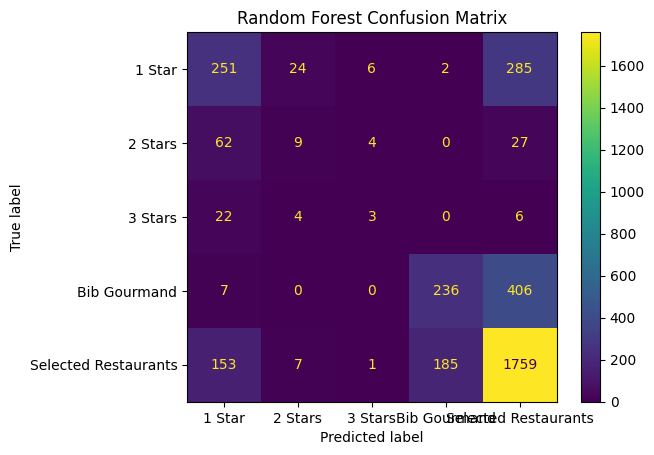

In [138]:
plot_confusion_matrix(cm_rf, 'Random Forest Confusion Matrix')


In [141]:
# Evaluate Random Forest

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    return [model_name, accuracy, precision, recall, f1]

evaluate_model(y_test, y_pred_rf, 'Random Forest')


Model: Random Forest
Accuracy: 0.6528
Precision: 0.6273
Recall: 0.6528
F1-score: 0.6317


['Random Forest',
 0.6527898236484533,
 np.float64(0.6272587212571935),
 np.float64(0.6527898236484533),
 np.float64(0.6316651872355962)]

In [169]:
# Step 7: Create a table for accurately predicted values
accurate_predictions_rf = pred_comparison[pred_comparison['True Award'] == pred_comparison['RF Prediction']]

# Print accurately predicted values
total_TEST = len(X_test)
print(f"\nrestaurants in testset: {total_TEST}")
print(f"\nrestaurants with Award accuratelly predicted with Random Forest:{len(accurate_predictions_rf)}")
print("\nAccurately Predicted Values (Random Forest):")
accurate_predictions_rf


restaurants in testset: 3459

restaurants with Award accuratelly predicted with Random Forest:2258

Accurately Predicted Values (Random Forest):


,Restaurant Name,Location,True Award,RF Prediction,LR Prediction,NB Prediction
0,Grand Cru,"Prague, Czech Republic",Selected Restaurants,Selected Restaurants,Selected Restaurants,Bib Gourmand
2,Hammer & Pincers,"Wymeswold, United Kingdom",Selected Restaurants,Selected Restaurants,Selected Restaurants,2 Stars
3,Kitchen Table,"London, United Kingdom",2 Stars,2 Stars,1 Star,3 Stars
4,Roe,"London, United Kingdom",Selected Restaurants,Selected Restaurants,Selected Restaurants,2 Stars
6,Le Servan,"Paris, France",Selected Restaurants,Selected Restaurants,Selected Restaurants,3 Stars
...,...,...,...,...,...,...
3451,Osteria Matto,"Lyon, France",Selected Restaurants,Selected Restaurants,Selected Restaurants,2 Stars
3452,Dorset,"Borne, Netherlands",Selected Restaurants,Selected Restaurants,Selected Restaurants,Bib Gourmand
3453,Kika,Macau,Selected Restaurants,Selected Restaurants,Selected Restaurants,1 Star
3454,Bootshaus,"Weissenhaus, Germany",Selected Restaurants,Selected Restaurants,Selected Restaurants,2 Stars


# 2. Logistic Regression

In [142]:
# Logistic Regression
lr_model = LogisticRegression(multi_class='ovr', solver='liblinear')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [143]:
lr_probs = lr_model.predict_proba(X_test)


In [144]:
lr_pred_df = pd.DataFrame(y_pred_lr, columns=[f'LR_Pred_Class'])
lr_pred_df

,LR_Pred_Class
0,4
1,4
2,4
3,0
4,4
...,...
3454,4
3455,4
3456,4
3457,3


In [145]:
lr_df = pd.DataFrame(lr_probs, columns=[f'LR_Prob_{label}' for label in class_labels])
lr_df


,LR_Prob_0,LR_Prob_1,LR_Prob_2,LR_Prob_3,LR_Prob_4
0,0.023597,0.001773,0.001001,0.079907,0.893722
1,0.220670,0.012429,0.004863,0.029314,0.732725
2,0.132379,0.002930,0.001281,0.020466,0.842945
3,0.516550,0.056718,0.003098,0.001856,0.421779
4,0.032843,0.001648,0.001262,0.183056,0.781192
...,...,...,...,...,...
3454,0.006212,0.000897,0.000260,0.230495,0.762136
3455,0.201281,0.025868,0.012997,0.250101,0.509754
3456,0.010440,0.000877,0.003572,0.161274,0.823838
3457,0.001526,0.000030,0.000057,0.740738,0.257648


In [146]:
LR=pd.concat([lr_df,lr_pred_df],axis=1)
LR

,LR_Prob_0,LR_Prob_1,LR_Prob_2,LR_Prob_3,LR_Prob_4,LR_Pred_Class
0,0.023597,0.001773,0.001001,0.079907,0.893722,4
1,0.220670,0.012429,0.004863,0.029314,0.732725,4
2,0.132379,0.002930,0.001281,0.020466,0.842945,4
3,0.516550,0.056718,0.003098,0.001856,0.421779,0
4,0.032843,0.001648,0.001262,0.183056,0.781192,4
...,...,...,...,...,...,...
3454,0.006212,0.000897,0.000260,0.230495,0.762136,4
3455,0.201281,0.025868,0.012997,0.250101,0.509754,4
3456,0.010440,0.000877,0.003572,0.161274,0.823838,4
3457,0.001526,0.000030,0.000057,0.740738,0.257648,3


In [128]:
comparison_df

,Restaurant Name,Location,True Award,RF_Prob_0,RF_Prob_1,RF_Prob_2,RF_Prob_3,RF_Prob_4
0,Grand Cru,"Prague, Czech Republic",Selected Restaurants,0.000,0.000,0.0,0.000000,1.000000
1,Wirtshaus Meyers Keller,"Nördlingen, Germany",1 Star,0.000,0.000,0.0,0.100000,0.900000
2,Hammer & Pincers,"Wymeswold, United Kingdom",Selected Restaurants,0.150,0.000,0.0,0.000000,0.850000
3,Kitchen Table,"London, United Kingdom",2 Stars,0.350,0.475,0.0,0.000000,0.175000
4,Roe,"London, United Kingdom",Selected Restaurants,0.100,0.000,0.0,0.000000,0.900000
...,...,...,...,...,...,...,...,...
3454,Bootshaus,"Weissenhaus, Germany",Selected Restaurants,0.000,0.000,0.0,0.100000,0.900000
3455,Summer Pavilion,Singapore,1 Star,0.425,0.000,0.0,0.000000,0.575000
3456,Liza,"Paris, France",Selected Restaurants,0.100,0.000,0.0,0.200000,0.700000
3457,Bún Bò Bà Rơi (Hai Chau),"Da Nang, Vietnam",Bib Gourmand,0.000,0.000,0.0,0.364307,0.635693


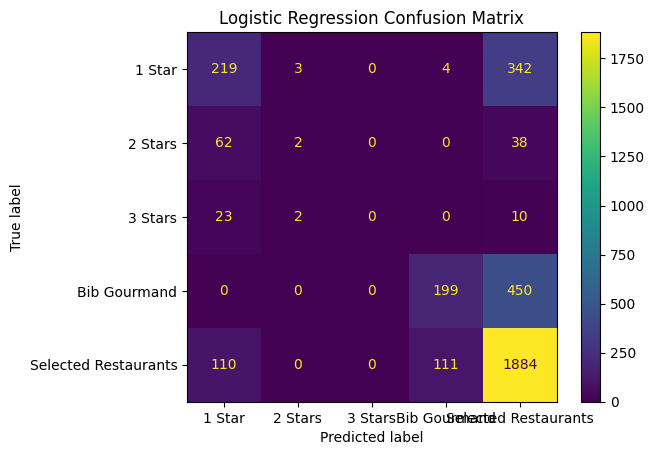

In [147]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm_lr, 'Logistic Regression Confusion Matrix')


In [148]:
evaluate_model(y_test, y_pred_lr, 'Logistic Regression')


Model: Logistic Regression
Accuracy: 0.6661
Precision: 0.6351
Recall: 0.6661
F1-score: 0.6267


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


['Logistic Regression',
 0.6660884648742411,
 np.float64(0.6350958657776739),
 np.float64(0.6660884648742411),
 np.float64(0.6267173298093696)]

In [171]:
accurate_predictions_lr = pred_comparison[pred_comparison['True Award'] == pred_comparison['LR Prediction']]

# Print accurately predicted values
total_TEST = len(X_test)
print(f"\nrestaurants in testset: {total_TEST}")
print(f"\nrestaurants with Award accuratelly predicted with Logistic Regression:{len(accurate_predictions_lr)}")
print("\nAccurately Predicted Values (Logistic Regression):")
accurate_predictions_lr


restaurants in testset: 3459

restaurants with Award accuratelly predicted with Logistic Regression:2304

Accurately Predicted Values (Logistic Regression):


,Restaurant Name,Location,True Award,RF Prediction,LR Prediction,NB Prediction
0,Grand Cru,"Prague, Czech Republic",Selected Restaurants,Selected Restaurants,Selected Restaurants,Bib Gourmand
2,Hammer & Pincers,"Wymeswold, United Kingdom",Selected Restaurants,Selected Restaurants,Selected Restaurants,2 Stars
4,Roe,"London, United Kingdom",Selected Restaurants,Selected Restaurants,Selected Restaurants,2 Stars
6,Le Servan,"Paris, France",Selected Restaurants,Selected Restaurants,Selected Restaurants,3 Stars
10,Candlelight,"S'Agaró, Spain",Selected Restaurants,Selected Restaurants,Selected Restaurants,1 Star
...,...,...,...,...,...,...
3452,Dorset,"Borne, Netherlands",Selected Restaurants,Selected Restaurants,Selected Restaurants,Bib Gourmand
3453,Kika,Macau,Selected Restaurants,Selected Restaurants,Selected Restaurants,1 Star
3454,Bootshaus,"Weissenhaus, Germany",Selected Restaurants,Selected Restaurants,Selected Restaurants,2 Stars
3456,Liza,"Paris, France",Selected Restaurants,Selected Restaurants,Selected Restaurants,Bib Gourmand


# 3. Naive Bayes Classifier 

In [150]:
from sklearn.naive_bayes import GaussianNB 
# Gaussian Naive Bayes
nb_model = GaussianNB()  # Initialize Naive Bayes model
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [151]:
nb_probs = nb_model.predict_proba(X_test)
nb_pred_df = pd.DataFrame(y_pred_nb, columns=[f'NB_Pred_Class'])
nb_pred_df

,NB_Pred_Class
0,3
1,3
2,1
3,2
4,1
...,...
3454,1
3455,2
3456,3
3457,3


In [152]:
nb_df = pd.DataFrame(nb_probs, columns=[f'NB_Prob_{label}' for label in class_labels])
NB=pd.concat([nb_df,nb_pred_df],axis=1)
NB

,NB_Prob_0,NB_Prob_1,NB_Prob_2,NB_Prob_3,NB_Prob_4,NB_Pred_Class
0,0.000000e+00,0.0,0.0,1.0,0.0,3
1,2.913715e-23,0.0,0.0,1.0,0.0,3
2,0.000000e+00,1.0,0.0,0.0,0.0,1
3,0.000000e+00,0.0,1.0,0.0,0.0,2
4,0.000000e+00,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...
3454,0.000000e+00,1.0,0.0,0.0,0.0,1
3455,0.000000e+00,0.0,1.0,0.0,0.0,2
3456,0.000000e+00,0.0,0.0,1.0,0.0,3
3457,0.000000e+00,0.0,0.0,1.0,0.0,3


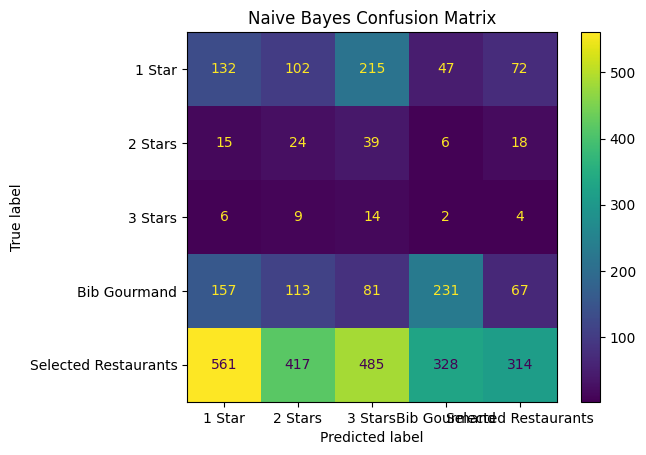

In [153]:
nb_lr = confusion_matrix(y_test, y_pred_nb)
plot_confusion_matrix(nb_lr, 'Naive Bayes Confusion Matrix')

In [154]:
evaluate_model(y_test, y_pred_nb, 'Naive Bayes')


Model: Naive Bayes
Accuracy: 0.2067
Precision: 0.4990
Recall: 0.2067
F1-score: 0.2491


['Naive Bayes',
 0.20670714079213645,
 np.float64(0.4989975837797107),
 np.float64(0.20670714079213645),
 np.float64(0.24905984769331402)]

In [172]:
accurate_predictions_nb = pred_comparison[pred_comparison['True Award'] == pred_comparison['NB Prediction']]

# Print accurately predicted values
total_TEST = len(X_test)
print(f"\nrestaurants in testset: {total_TEST}")
print(f"\nrestaurants with Award accuratelly predicted with Naive Bayes:{len(accurate_predictions_nb)}")
print("\nAccurately Predicted Values (Naive Bayes):")
accurate_predictions_nb


restaurants in testset: 3459

restaurants with Award accuratelly predicted with Naive Bayes:715

Accurately Predicted Values (Naive Bayes):


,Restaurant Name,Location,True Award,RF Prediction,LR Prediction,NB Prediction
16,Taian,"Osaka, Japan",3 Stars,1 Star,1 Star,3 Stars
20,Landgasthof Schwanen,"Bad Bellingen, Germany",Bib Gourmand,Selected Restaurants,Selected Restaurants,Bib Gourmand
22,Breizh Café Cancale,"Cancale, France",Selected Restaurants,Bib Gourmand,Selected Restaurants,Selected Restaurants
24,Lake Road Kitchen,"Ambleside, United Kingdom",1 Star,1 Star,1 Star,1 Star
27,Baan Ta Ko Rai,"Phra Nakhon Si Ayutthaya, Thailand",Bib Gourmand,Selected Restaurants,Selected Restaurants,Bib Gourmand
...,...,...,...,...,...,...
3441,Anetseder,"Hauzenberg, Germany",Bib Gourmand,Bib Gourmand,Bib Gourmand,Bib Gourmand
3444,Culinair,"Lauwe, Belgium",Selected Restaurants,Selected Restaurants,Selected Restaurants,Selected Restaurants
3448,Mor Mu Dong,"Phuket, Thailand",Bib Gourmand,Selected Restaurants,Bib Gourmand,Bib Gourmand
3457,Bún Bò Bà Rơi (Hai Chau),"Da Nang, Vietnam",Bib Gourmand,Selected Restaurants,Bib Gourmand,Bib Gourmand


# Results

In [157]:
# Add the original Name, Location, and True Award for easy comparison
test_restaurants = pd.DataFrame({
    'Restaurant Name': df_with_dummies.loc[test_indices, 'Name'].values,  # Get names using test_indices
    'Location': df_with_dummies.loc[test_indices, 'Location'].values,      # Get locations using test_indices
    'True Award': label_encoder.inverse_transform(y_test),
    
})

# Combine everything into a single DataFrame
comparison_df = pd.concat([test_restaurants, RF, LR, NB], axis=1)

In [158]:
comparison_df

,Restaurant Name,Location,True Award,RF_Prob_0,RF_Prob_1,RF_Prob_2,RF_Prob_3,RF_Prob_4,RF_Pred_Class,LR_Prob_0,...,LR_Prob_2,LR_Prob_3,LR_Prob_4,LR_Pred_Class,NB_Prob_0,NB_Prob_1,NB_Prob_2,NB_Prob_3,NB_Prob_4,NB_Pred_Class
0,Grand Cru,"Prague, Czech Republic",Selected Restaurants,0.000,0.000,0.0,0.000000,1.000000,4,0.023597,...,0.001001,0.079907,0.893722,4,0.000000e+00,0.0,0.0,1.0,0.0,3
1,Wirtshaus Meyers Keller,"Nördlingen, Germany",1 Star,0.000,0.000,0.0,0.100000,0.900000,4,0.220670,...,0.004863,0.029314,0.732725,4,2.913715e-23,0.0,0.0,1.0,0.0,3
2,Hammer & Pincers,"Wymeswold, United Kingdom",Selected Restaurants,0.150,0.000,0.0,0.000000,0.850000,4,0.132379,...,0.001281,0.020466,0.842945,4,0.000000e+00,1.0,0.0,0.0,0.0,1
3,Kitchen Table,"London, United Kingdom",2 Stars,0.350,0.475,0.0,0.000000,0.175000,1,0.516550,...,0.003098,0.001856,0.421779,0,0.000000e+00,0.0,1.0,0.0,0.0,2
4,Roe,"London, United Kingdom",Selected Restaurants,0.100,0.000,0.0,0.000000,0.900000,4,0.032843,...,0.001262,0.183056,0.781192,4,0.000000e+00,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,Bootshaus,"Weissenhaus, Germany",Selected Restaurants,0.000,0.000,0.0,0.100000,0.900000,4,0.006212,...,0.000260,0.230495,0.762136,4,0.000000e+00,1.0,0.0,0.0,0.0,1
3455,Summer Pavilion,Singapore,1 Star,0.425,0.000,0.0,0.000000,0.575000,4,0.201281,...,0.012997,0.250101,0.509754,4,0.000000e+00,0.0,1.0,0.0,0.0,2
3456,Liza,"Paris, France",Selected Restaurants,0.100,0.000,0.0,0.200000,0.700000,4,0.010440,...,0.003572,0.161274,0.823838,4,0.000000e+00,0.0,0.0,1.0,0.0,3
3457,Bún Bò Bà Rơi (Hai Chau),"Da Nang, Vietnam",Bib Gourmand,0.000,0.000,0.0,0.364307,0.635693,4,0.001526,...,0.000057,0.740738,0.257648,3,0.000000e+00,0.0,0.0,1.0,0.0,3


In [177]:
# Step 6: Create a table comparing predictions from all models
pred_comparison = pd.DataFrame({
    'Restaurant Name': data.loc[test_indices, 'Name'].values,  # Get names using test_indices
    'Location': data.loc[test_indices, 'Location'].values,      # Get locations using test_indices
    'True Award': label_encoder.inverse_transform(y_test),
    'RF Prediction': label_encoder.inverse_transform(y_pred_rf),
    'LR Prediction': label_encoder.inverse_transform(y_pred_lr),
    'NB Prediction': label_encoder.inverse_transform(y_pred_nb)  # Include Naive Bayes predictions
})

print("\nPrediction Comparison Table:")
pred_comparison


Prediction Comparison Table:


,Restaurant Name,Location,True Award,RF Prediction,LR Prediction,NB Prediction
0,Grand Cru,"Prague, Czech Republic",Selected Restaurants,Selected Restaurants,Selected Restaurants,Bib Gourmand
1,Wirtshaus Meyers Keller,"Nördlingen, Germany",1 Star,Selected Restaurants,Selected Restaurants,Bib Gourmand
2,Hammer & Pincers,"Wymeswold, United Kingdom",Selected Restaurants,Selected Restaurants,Selected Restaurants,2 Stars
3,Kitchen Table,"London, United Kingdom",2 Stars,2 Stars,1 Star,3 Stars
4,Roe,"London, United Kingdom",Selected Restaurants,Selected Restaurants,Selected Restaurants,2 Stars
...,...,...,...,...,...,...
3454,Bootshaus,"Weissenhaus, Germany",Selected Restaurants,Selected Restaurants,Selected Restaurants,2 Stars
3455,Summer Pavilion,Singapore,1 Star,Selected Restaurants,Selected Restaurants,3 Stars
3456,Liza,"Paris, France",Selected Restaurants,Selected Restaurants,Selected Restaurants,Bib Gourmand
3457,Bún Bò Bà Rơi (Hai Chau),"Da Nang, Vietnam",Bib Gourmand,Selected Restaurants,Bib Gourmand,Bib Gourmand


In [180]:
test_restaurants

,Restaurant Name,Location,True Award
0,Grand Cru,"Prague, Czech Republic",Selected Restaurants
1,Wirtshaus Meyers Keller,"Nördlingen, Germany",1 Star
2,Hammer & Pincers,"Wymeswold, United Kingdom",Selected Restaurants
3,Kitchen Table,"London, United Kingdom",2 Stars
4,Roe,"London, United Kingdom",Selected Restaurants
...,...,...,...
3454,Bootshaus,"Weissenhaus, Germany",Selected Restaurants
3455,Summer Pavilion,Singapore,1 Star
3456,Liza,"Paris, France",Selected Restaurants
3457,Bún Bò Bà Rơi (Hai Chau),"Da Nang, Vietnam",Bib Gourmand


In [203]:
# Find rows where all classifiers predicted the correct award
accurate_preds_df = pred_comparison[
    (pred_comparison['RF Prediction'] == pred_comparison['True Award']) &
    (pred_comparison['LR Prediction'] == pred_comparison['True Award']) &
    (pred_comparison['NB Prediction'] == pred_comparison['True Award'])
]


# Print accurately predicted value
print(f"\nrestaurants in testset: {total_TEST}")
print(f"\nrestaurants with Award accuratelly predicted with all 3 methods:{len(accurate_preds_df)}")
print("\nAccurately Predicted Values with all 3 methods:")

# Display the table with accurate predictions from all three methods
accurate_preds_df


restaurants in testset: 3459

restaurants with Award accuratelly predicted with all 3 methods:408

Accurately Predicted Values with all 3 methods:


,Restaurant Name,Location,True Award,RF Prediction,LR Prediction,NB Prediction
24,Lake Road Kitchen,"Ambleside, United Kingdom",1 Star,1 Star,1 Star,1 Star
71,ROM,"Roses, Spain",Selected Restaurants,Selected Restaurants,Selected Restaurants,Selected Restaurants
78,Hudson Smokehouse,"Bronx, USA",Selected Restaurants,Selected Restaurants,Selected Restaurants,Selected Restaurants
87,Brasserie du Château,"Bottmingen, Switzerland",Selected Restaurants,Selected Restaurants,Selected Restaurants,Selected Restaurants
127,Cristó,"Zierikzee, Netherlands",Selected Restaurants,Selected Restaurants,Selected Restaurants,Selected Restaurants
...,...,...,...,...,...,...
3408,Forde,"Horsforth, United Kingdom",Selected Restaurants,Selected Restaurants,Selected Restaurants,Selected Restaurants
3427,Nils,"Koksijde, Belgium",Selected Restaurants,Selected Restaurants,Selected Restaurants,Selected Restaurants
3430,Vecchia Malcesine,"Malcesine, Italy",1 Star,1 Star,1 Star,1 Star
3441,Anetseder,"Hauzenberg, Germany",Bib Gourmand,Bib Gourmand,Bib Gourmand,Bib Gourmand



Total number of restaurants: 408
 True Award
Selected Restaurants    279
Bib Gourmand             86
1 Star                   43
Name: count, dtype: int64


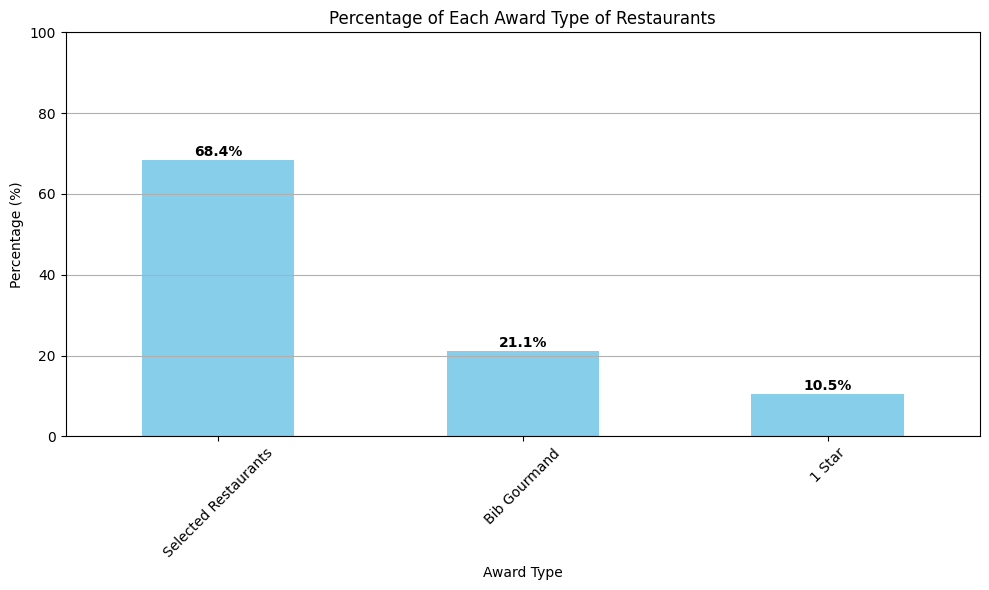

In [200]:
# Step 3: Calculate total number of restaurants for the overall category
total_restaurants = len(accurate_preds_df)
print(f"\nTotal number of restaurants: {total_restaurants}")

# Step 1: Calculate the percentage of each award type
award_counts = accurate_preds_df['True Award'].value_counts()
award_percentages = (award_counts / award_counts.sum()) * 100
print(f" {award_counts}")
# Step 2: Plot the data
plt.figure(figsize=(10, 6))
award_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Each Award Type of Restaurants')
plt.xlabel('Award Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.grid(axis='y')

# Display the percentage on top of the bars
for i, v in enumerate(award_percentages):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()  # Adjust layout for better fit
plt.show()


Total number of restaurants in testset: 3459
 True Award
Selected Restaurants    279
Bib Gourmand             86
1 Star                   43
Name: count, dtype: int64


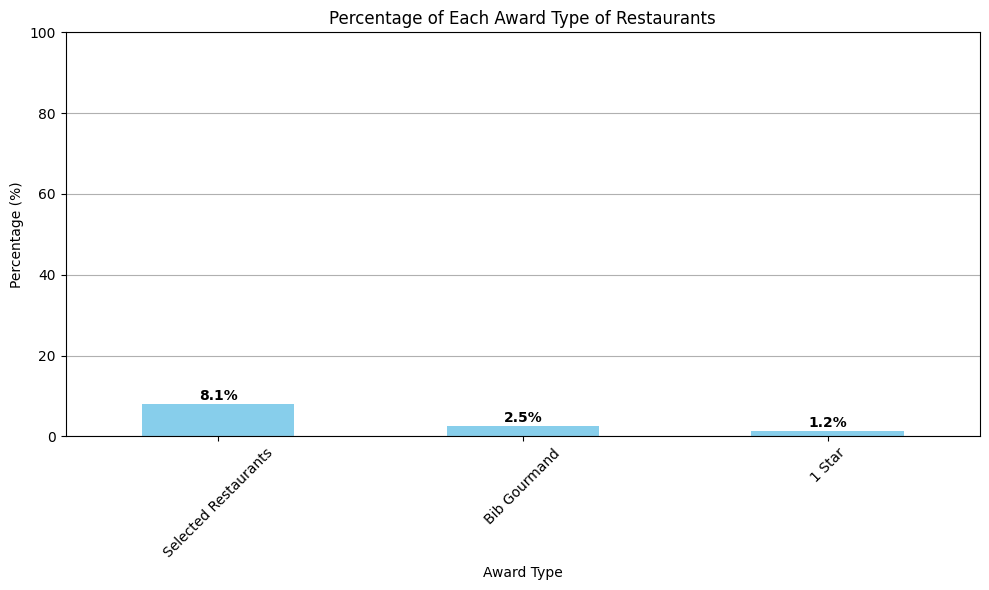

In [206]:
# Step 3: Calculate total number of restaurants for the overall category
print(f"\nTotal number of restaurants in testset: {total_TEST}")

# Step 1: Calculate the percentage of each award type
award_counts = accurate_preds_df['True Award'].value_counts()
award_test=comparison_df['True Award'].value_counts()
award_percentages = (award_counts / award_test.sum()) * 100
print(f" {award_counts}")
# Step 2: Plot the data
plt.figure(figsize=(10, 6))
award_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Each Award Type of Restaurants')
plt.xlabel('Award Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.grid(axis='y')

# Display the percentage on top of the bars
for i, v in enumerate(award_percentages):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [173]:
# Initialize a list to store the results
results = []

# Evaluate Random Forest
results.append(evaluate_model(y_test, y_pred_rf, 'Random Forest'))

# Evaluate Logistic Regression
results.append(evaluate_model(y_test, y_pred_lr, 'Logistic Regression'))

# Evaluate Gaussian Naive Bayes
results.append(evaluate_model(y_test, y_pred_nb, 'Gaussian Naive Bayes'))

# Step 5: Create an accuracy table with metrics from all models
metrics_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
print("\nAccuracy Table:")
metrics_df


Model: Random Forest
Accuracy: 0.6528
Precision: 0.6273
Recall: 0.6528
F1-score: 0.6317

Model: Logistic Regression
Accuracy: 0.6661
Precision: 0.6351
Recall: 0.6661
F1-score: 0.6267

Model: Gaussian Naive Bayes
Accuracy: 0.2067
Precision: 0.4990
Recall: 0.2067
F1-score: 0.2491

Accuracy Table:


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.652790,0.627259,0.652790,0.631665
1,Logistic Regression,0.666088,0.635096,0.666088,0.626717
2,Gaussian Naive Bayes,0.206707,0.498998,0.206707,0.249060
